In [1]:
import pydicom 
# Cargar un archivo DICOM 
dicom_path = './images/x_ray_codo_derecho_1.dcm' 
ds = pydicom.dcmread(dicom_path) 
# Mostrar información básica 
print(ds)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 208
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.392.200046.100.14.606265916488627874549458605775092263053
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.2.135.1066.101
(0002, 0013) Implementation Version Name         SH: '1.5.0/WIN32'
-------------------------------------------------
(0008, 0000) Group Length                        UL: 402
(0008, 0005) Specific Character Set              CS: 'ISO_IR 148'
(0008, 0008) Image Type                          CS: ['DERIVED', 'PRIMARY', '']
(0008, 0016) SOP Class UID                       UI: Digital X-Ray Image Storage - For Presentation
(0008, 0018) SOP Instance 

In [2]:
print('Patient Name:', ds.PatientName) 
print('Patient ID:', ds.PatientID) 
print('Study Date:', ds.StudyDate) 
print('Modality:', ds.Modality) 
print('Manufacturer:', ds.Manufacturer)

Patient Name: DE OLIVARES REIS^MAURICIO
Patient ID: H131665
Study Date: 20250530
Modality: DX
Manufacturer: Canon Inc.


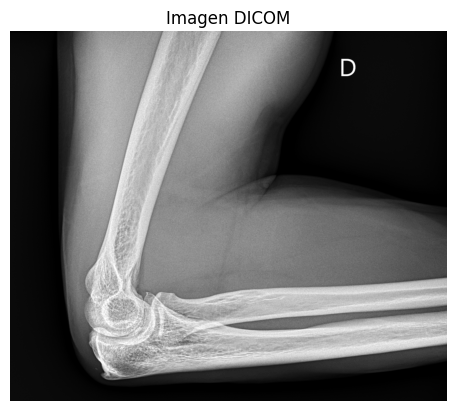

In [17]:
import matplotlib.pyplot as plt 
# Acceder a los datos de imagen 
image = ds.pixel_array 
# Mostrar la imagen 
plt.imshow(image, cmap='gray') 
plt.title('Imagen DICOM') 
plt.axis('off') 
plt.show()

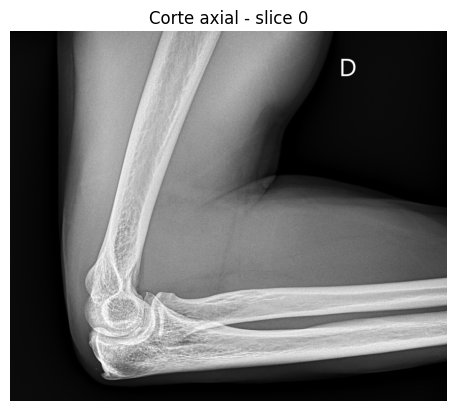

In [15]:
# Visualizar un corte axial 
slice_idx = nifti_data.shape[2] // 2 
plt.imshow(nifti_data[:, :, slice_idx], cmap='gray') 
plt.title(f'Corte axial - slice {slice_idx}') 
plt.axis('off') 
plt.show()

In [ ]:
## Visualizar cortes en diferentes planos 
# Corte axial 
plt.imshow( image[:, :, image.shape[2] // 2], cmap='gray') 
plt.title('Corte Axial') 
plt.axis('off') 
plt.show() # Corte coronal 
plt.imshow(image[:, image.shape[1] // 2, :], cmap='gray') 
plt.title('Corte Coronal') 
plt.axis('off') 
plt.show() # Corte sagital 
plt.imshow(image[image.shape[0] // 2, :, :], cmap='gray') 
plt.title('Corte Sagital') 
plt.axis('off') 
plt.show()

In [8]:
import numpy as np
import nibabel as nib

# Obtener los datos de píxeles del DICOM
pixel_array = ds.pixel_array

# Expandir dimensiones si es necesario (NIfTI espera al menos 3D)
if pixel_array.ndim == 2:
    pixel_array = np.expand_dims(pixel_array, axis=-1)

# Crear un objeto Nifti1Image
nifti_img = nib.Nifti1Image(pixel_array, affine=np.eye(4))

# Guardar el archivo NIfTI
nifti_path = dicom_path.replace('.dcm', '.nii.gz')
nib.save(nifti_img, nifti_path)

print(f'NIfTI file saved at: {nifti_path}')

NIfTI file saved at: ./images/x_ray_codo_derecho_1.nii.gz


In [9]:
import nibabel as nib 
# Cargar un archivo NIfTI 
nifti_path = './images/x_ray_codo_derecho_1.nii.gz' 
nifti_img = nib.load(nifti_path) 
# Mostrar la forma de los datos 
print('Shape:', nifti_img.shape) 
# Obtener la imagen en array 
nifti_data = nifti_img.get_fdata()
nifti_data

Shape: (1518, 1793, 1)


array([[[2046.],
        [2365.],
        [1903.],
        ...,
        [ 519.],
        [ 455.],
        [ 384.]],

       [[1026.],
        [1068.],
        [ 798.],
        ...,
        [ 433.],
        [ 335.],
        [ 358.]],

       [[ 219.],
        [ 226.],
        [ 255.],
        ...,
        [ 305.],
        [ 331.],
        [ 393.]],

       ...,

       [[3044.],
        [2920.],
        [2775.],
        ...,
        [ 778.],
        [ 898.],
        [ 909.]],

       [[2983.],
        [2756.],
        [2787.],
        ...,
        [ 905.],
        [ 876.],
        [ 878.]],

       [[2934.],
        [2858.],
        [2953.],
        ...,
        [ 880.],
        [ 961.],
        [ 960.]]])